<a href="https://colab.research.google.com/github/moupriyaroy25/Instacart-market-basket-analysis/blob/master/Simple_EDA_using_instacart_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading Data and required libraries**

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()


In [12]:
aislesdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/aisles.csv/aisles.csv')
departmentdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/departments.csv/departments.csv')
Order_Products_Prior_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')
Order_Products_Train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')
ordersdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/orders.csv/orders.csv')
productsdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/instacart-market-basket-analysis/products.csv/products.csv')

**Reorder frquency in a week**

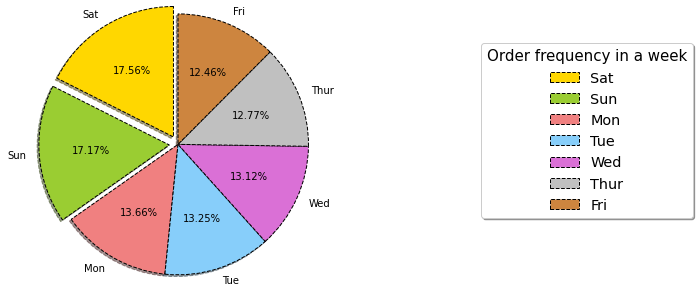

In [14]:
#ordersdf.head(6)
#droppin nan value might change thw frequency of reorder, so we won't do that
reorder_dow=ordersdf['order_dow'].value_counts()
reorder_dow_day_name=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
cols = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orchid','silver','peru']
plt.pie(reorder_dow,
  labels=reorder_dow_day_name,
  colors=cols,radius=1.5,
  startangle=90,wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'dashed', 'antialiased': True},shadow= True,autopct='%0.2f%%',explode=[0.1,0.1,0,0,0,0,0])
plt.legend(reorder_dow_day_name,
          title="Order frequency in a week",title_fontsize=15,
          loc="upper right",
          bbox_to_anchor=(1,0,1.9,1),fontsize='x-large',shadow=True) 
plt.show()

**Interval between Reorders of Users**

In [31]:
reorder_interval = ordersdf[['user_id','days_since_prior_order']].groupby('user_id').aggregate(np.nanmean)

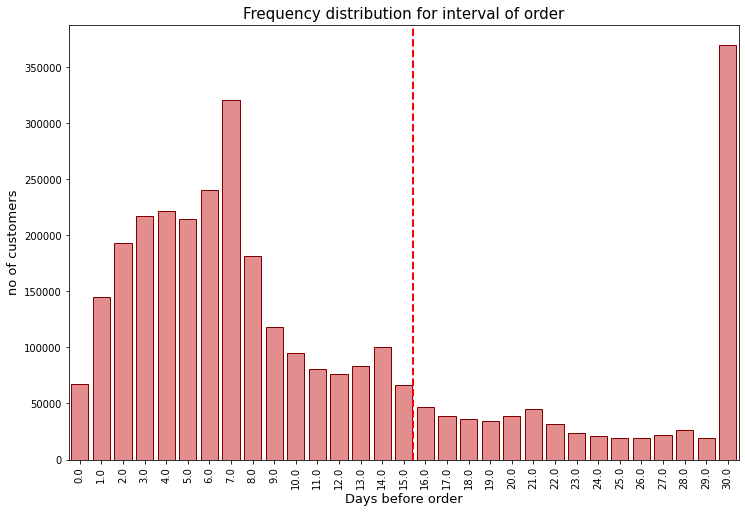

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=ordersdf, color='lightcoral',edgecolor="maroon")
plt.axvline(reorder_interval['days_since_prior_order'].mean(), 
            color='red', linestyle='dashed', linewidth=2)
plt.ylabel('no of customers', fontsize=13)
plt.xlabel('Days before order', fontsize=13)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution for interval of order", fontsize=15)
plt.show()

Days since prior orderaverage:15 days

**Frequency Distribution of Reorders w.r.t time of the day**

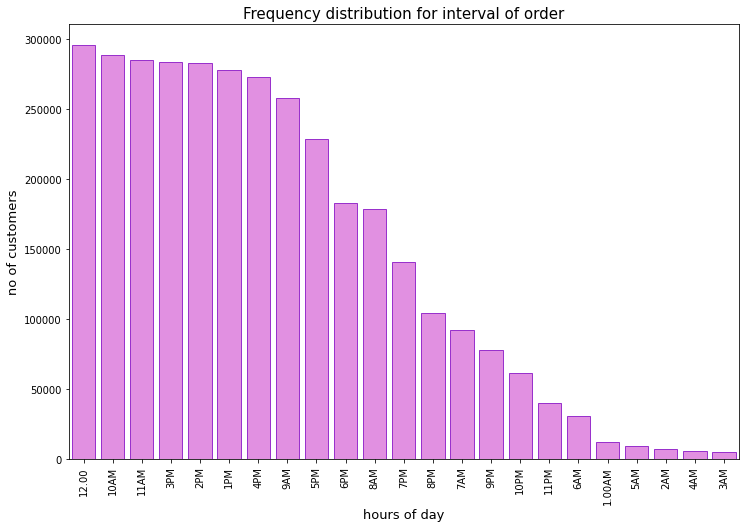

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",order=ordersdf['order_hour_of_day'].value_counts().index,data=ordersdf, color='violet',edgecolor="darkorchid")
plt.ylabel('no of customers', fontsize=13)
plt.xlabel('hours of day', fontsize=13)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution for interval of order", fontsize=15)
plt.show()

**Frequency distribution of Day of week Vs Hour of day**

<Figure size 864x432 with 0 Axes>

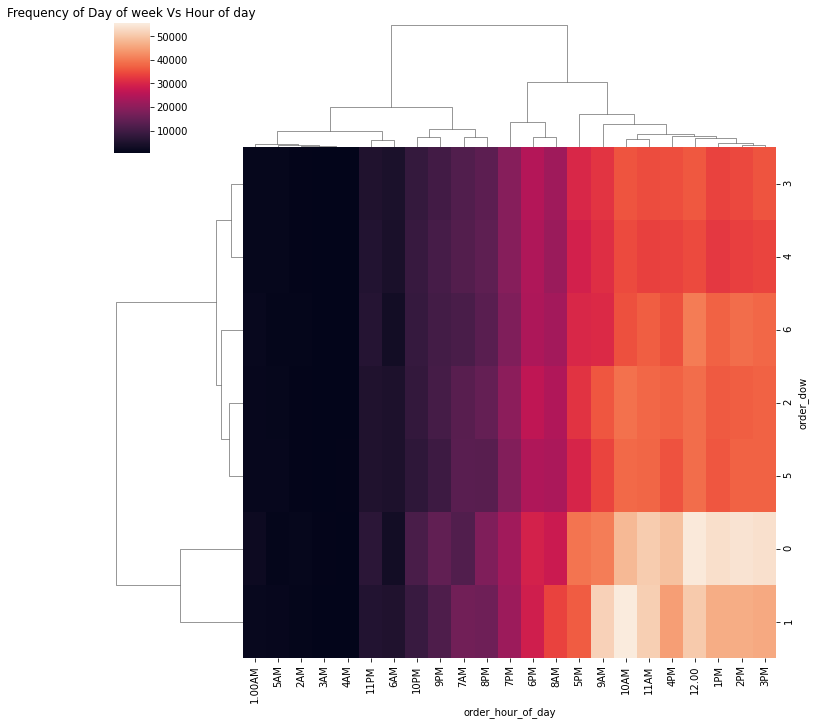

In [79]:
grouped_df = ordersdf.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.clustermap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

Prime time for orders are: 10 am at Sunday ,12.00 noon at Saturday i.e daytime on weekends

**Most popular 20 products bought by customers (based on product types)**

In [119]:
Order_Product_Name_Prior = pd.merge(Order_Products_Prior_df, 
                                    productsdf, how='left', on='product_id')
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    departmentdf, on='department_id', how='left')

In [120]:
prior = pd.merge(Prior_User_Order_Product,aislesdf,on=['aisle_id','aisle_id'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


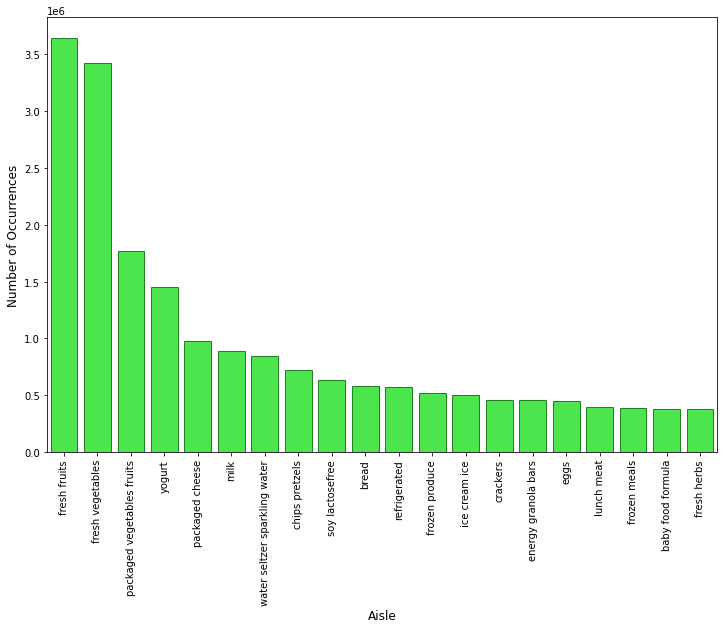

In [121]:
cnt_srs = prior['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='lime',edgecolor='darkgreen')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Top 20 popular product (based on product names)**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


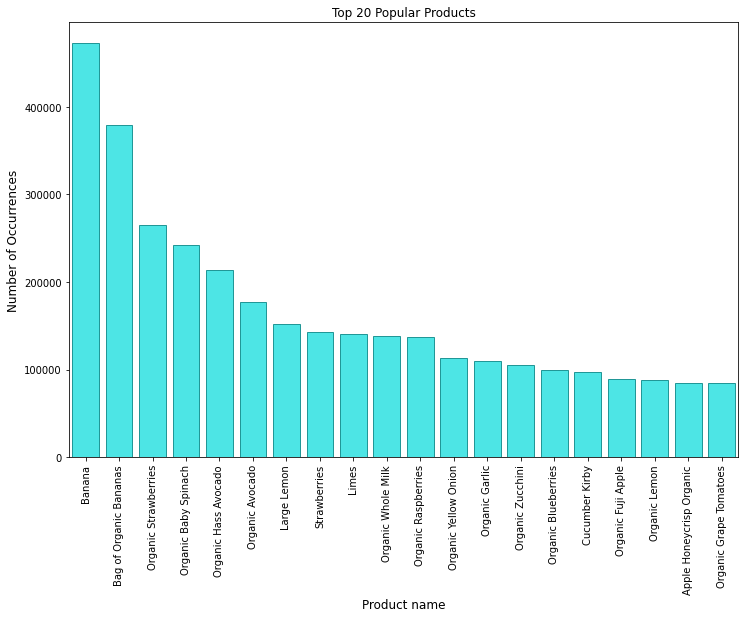

In [124]:
cnt_srf = prior['product_name'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srf.index, cnt_srf.values, alpha=0.8, color='aqua',edgecolor='teal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product name', fontsize=12)
plt.title('Top 20 Popular Products')
plt.xticks(rotation='vertical')
plt.show()

**Department wise reorder ratio**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


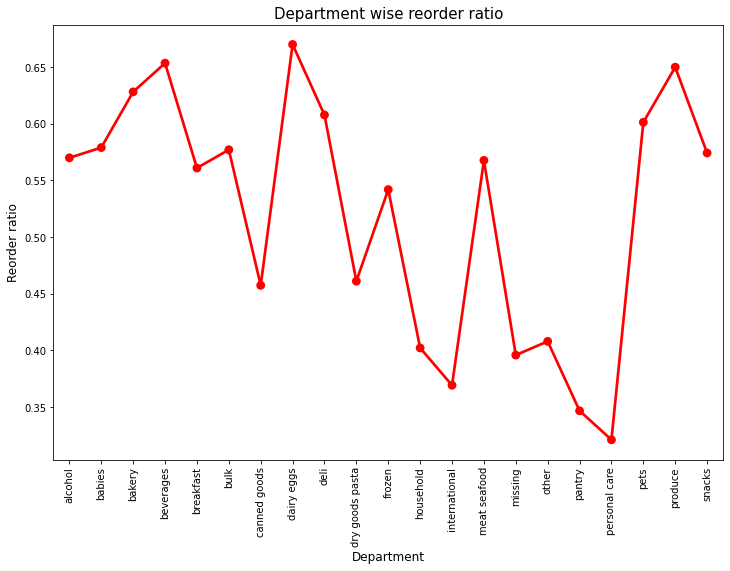

In [123]:
grouped_df = prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color='red')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

**Lowest reorder ratio**:Personal care
**Highest reorder ratio**:Dairy eggs
Other depertments with higher reorder raio: beverages,meat seafood,frozen,Produce etc.